In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/raw/44V-GEU314__Informe_Completo_2022-05-25_12-16-58_Seguimiento del sensor.csv', encoding='utf-8', sep=';', index_col=0)
df.head(10)

,Fecha y Hora,Coordenadas,Localización,Aceleracion Frenadas*,Altitud*,Bateria Respaldo*,Bateria Vehiculo*,Curso*,eng_eff_on_fuelconsmath*,Ignicion*,Kilometraje*,Velocidad*,Tarjeta*,Tarjetas*,Velocidad,Conductor,Unnamed: 17
№,,,,,,,,,,,,,,,,,
1,2022-05-01 00:36:30,"4.604121, -74.145759","Kennedy, Colombia, Bogotá, Transversal 72Fbis ...",----,2599.90 mt,96.00 %,12.77 V,139.00 º,----,Apagado,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
2,2022-05-01 01:35:58,"4.604121, -74.145759","Kennedy, Colombia, Bogotá, Transversal 72Fbis ...",----,2599.90 mt,96.00 %,12.77 V,139.00 º,1.00,Apagado,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
3,2022-05-01 02:00:06,"4.604121, -74.145759","Kennedy, Colombia, Bogotá, Transversal 72Fbis ...",----,2599.90 mt,----,----,139.00 º,1.00,----,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
4,2022-05-01 02:00:30,"4.603913, -74.145905","Kennedy, Colombia, Bogotá, Carrera 72G 42B S 68",----,2568.30 mt,----,----,0.00 º,----,----,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
5,2022-05-01 02:00:30,"4.603913, -74.145905","Kennedy, Colombia, Bogotá, Carrera 72G 42B S 68",----,2568.30 mt,96.00 %,0.00 V,0.00 º,1.00,Apagado,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
6,2022-05-01 02:58:05,"4.603913, -74.145905","Kennedy, Colombia, Bogotá, Carrera 72G 42B S 68",----,2568.30 mt,96.00 %,12.77 V,0.00 º,1.00,Apagado,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
7,2022-05-01 03:57:38,"4.603913, -74.145905","Kennedy, Colombia, Bogotá, Carrera 72G 42B S 68",----,2568.30 mt,96.00 %,12.77 V,0.00 º,1.00,Apagado,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
8,2022-05-01 04:57:37,"4.603913, -74.145905","Kennedy, Colombia, Bogotá, Carrera 72G 42B S 68",----,2568.30 mt,96.00 %,12.76 V,0.00 º,1.00,Apagado,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN
9,2022-05-01 05:57:39,"4.603913, -74.145905","Kennedy, Colombia, Bogotá, Carrera 72G 42B S 68",----,2568.30 mt,96.00 %,12.76 V,0.00 º,1.00,Apagado,59656.20 km,0.00 Km/h,----,----,0 km/h,----,NaN


## Data Cleaning

### replace default value '---' for NaN

In [4]:
for column in df.select_dtypes('object').columns:
    df[column] = df[column].replace(r'----', np.NaN, regex=True)

### set up report dataframe

In [5]:
#New report DataFrame
df_rep = pd.DataFrame()

#Date column
df_rep['datetime'] = pd.to_datetime(df['Fecha y Hora'], format='%Y-%m-%d %H:%M:%S')

#geo position columns
df_rep['latitude'] = df['Coordenadas'].str.split(',').str[0].astype('float32')
df_rep['longitude'] = df['Coordenadas'].str.split(',').str[1].astype('float32')
df_rep['lat_lon'] = df_rep['latitude'].round(3).astype('str') + ',' + df_rep['longitude'].round(3).astype('str')
df_rep['course'] = df['Curso*'].str.extract(r'(\d*.?\d{0,2})', expand=False).astype('float32')
df_rep['altitude'] = df['Altitud*'].str.extract(r'(\d*\.?\d{0,2})', expand=False)

#Ubication columns
df_rep['country'] = df['Localización'].str.split(',').str[1]
df_rep['city'] = df['Localización'].str.split(',').str[2]
df_rep['location'] = df['Localización'].str.split(',').str[0]
df_rep['address'] = df['Localización'].str.split(',', n=3).str[3]

#Battery columns
df_rep['battery_perc'] = df['Bateria Respaldo*'].str.extract(r'(\d*.?\d{0,2})', expand=False).astype('float32')/100
df_rep['battery_volt'] = df['Bateria Vehiculo*'].str.extract(r'(\d*.?\d{0,2})', expand=False).astype('float32')

#Sensor columns
df_rep['eng_eff'] = df['eng_eff_on_fuelconsmath*'].astype('float32')
df_rep['ignition'] = df['Ignicion*'].map({'Apagado': False, 'Encendido': True})#.astype('bool')
df_rep['millage'] = df['Kilometraje*'].str.extract(r'(\d*.?\d{0,2})', expand=False).astype('float32')
df_rep['velocity'] = df['Velocidad*'].str.extract(r'(\d*.?\d{0,2})', expand=False).astype('float32')

In [6]:
df_rep = df_rep.set_index(pd.DatetimeIndex(df_rep['datetime']), drop=True)
df_rep.drop(columns=['datetime'], inplace=True)
df_rep.sample(10)

,latitude,longitude,lat_lon,course,altitude,country,city,location,address,battery_perc,battery_volt,eng_eff,ignition,millage,velocity
datetime,,,,,,,,,,,,,,,
2022-05-09 05:40:34,4.604317,-74.144241,"4.604,-74.144",18.0,2576.30,Colombia,Bogotá,Kennedy,Calle 40 Sur Transversal 72F 2,0.93,14.20,10.80,True,60636.199219,13.0
2022-05-06 09:00:28,4.517508,-75.608444,"4.518,-75.608",186.0,2074.60,Colombia,Quindío,Calarca,40,0.94,14.20,10.80,True,60298.300781,27.0
2022-05-01 15:31:26,4.269215,-74.999077,"4.269,-74.999",349.0,486.30,Colombia,Tolima,Coello,40,0.95,0.00,18.67,True,59846.101562,85.0
2022-05-13 07:30:23,4.747849,-74.046623,"4.748,-74.047",10.0,2583.10,Colombia,Bogotá,Usaquén,Avenida Carrera 45 166 32,0.92,14.13,1.00,True,60976.500000,0.0
2022-05-12 17:12:55,4.603964,-74.145592,"4.604,-74.146",149.0,2585.40,Colombia,Bogotá,Kennedy,Transversal 72F Calle 41 S 38,0.92,14.00,1.00,True,60938.000000,0.0
2022-05-23 12:07:43,4.710310,-74.106598,"4.71,-74.107",143.0,2568.80,Colombia,Bogotá,Engativá,Carrera 95B 81,NaN,NaN,10.80,False,NaN,0.0
2022-05-01 08:11:19,4.640514,-74.067505,"4.641,-74.068",99.0,2598.70,Colombia,Bogotá,Teusaquillo,Avenida Pablo Vi 19,0.95,14.32,10.80,True,59669.500000,48.0
2022-05-01 15:37:21,4.300532,-75.050049,"4.301,-75.05",311.0,667.30,Colombia,Tolima,Ibagué,40,0.95,13.74,11.60,True,59853.000000,0.0
2022-05-01 15:41:26,4.322310,-75.078743,"4.322,-75.079",273.0,740.90,Colombia,Tolima,Ibagué,40,NaN,NaN,18.67,NaN,59857.601562,85.0


## Visualization and EDA

In [7]:
from pandas_profiling import ProfileReport


In [8]:
# import pandas_profiling as pp
# pp.version.__version__

In [9]:
prof = ProfileReport(df_rep, minimal=True, title='Pandas Profiling Report')
# prof.to_file(output_file="./../reports/first_looks/report_1.html")

In [10]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Here we can notice that there is a high number of 0's on velocity column (3792), let's see what can be happening, as a first approach we can review if this is related to time when the vehicle it's turned off

In [11]:
df_vel_0 = df_rep[df_rep['velocity'] == 0]
df_vel_0.groupby('ignition').size()

ignition
False     880
True     2866
dtype: int64

As a first look there is noticiable difference between the amount of time that the vehicle was turned off and on whit velocity equals to zero, however here we didn't take into account that the sensors capture the velocity with less frequency while vehicle is turned off

In [12]:
df_rep['time_range'] = df_rep.index.to_series().shift(-1) - df_rep.index.to_series()

In [13]:
df_vel_0 = df_rep[df_rep['velocity'] == 0]
df_vel_0

,latitude,longitude,lat_lon,course,altitude,country,city,location,address,battery_perc,battery_volt,eng_eff,ignition,millage,velocity,time_range
datetime,,,,,,,,,,,,,,,,
2022-05-01 00:36:30,4.604121,-74.145760,"4.604,-74.146",139.0,2599.90,Colombia,Bogotá,Kennedy,Transversal 72Fbis Calle 41 S 65,0.96,12.77,NaN,False,59656.199219,0.0,0 days 00:59:28
2022-05-01 01:35:58,4.604121,-74.145760,"4.604,-74.146",139.0,2599.90,Colombia,Bogotá,Kennedy,Transversal 72Fbis Calle 41 S 65,0.96,12.77,1.0,False,59656.199219,0.0,0 days 00:24:08
2022-05-01 02:00:06,4.604121,-74.145760,"4.604,-74.146",139.0,2599.90,Colombia,Bogotá,Kennedy,Transversal 72Fbis Calle 41 S 65,NaN,NaN,1.0,NaN,59656.199219,0.0,0 days 00:00:24
2022-05-01 02:00:30,4.603913,-74.145905,"4.604,-74.146",0.0,2568.30,Colombia,Bogotá,Kennedy,Carrera 72G 42B S 68,NaN,NaN,NaN,NaN,59656.199219,0.0,0 days 00:00:00
2022-05-01 02:00:30,4.603913,-74.145905,"4.604,-74.146",0.0,2568.30,Colombia,Bogotá,Kennedy,Carrera 72G 42B S 68,0.96,0.00,1.0,False,59656.199219,0.0,0 days 00:57:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25 12:04:20,4.708745,-74.121574,"4.709,-74.122",224.0,2564.40,Colombia,Bogotá,Engativá,Transversal 106 Calle 72A 5,0.98,14.28,1.0,True,61843.398438,0.0,0 days 00:00:57
2022-05-25 12:10:17,4.698064,-74.124649,"4.698,-74.125",230.0,2571.30,Colombia,Bogotá,Engativá,Carrera 105 65 5,0.97,14.47,10.8,True,61844.898438,0.0,0 days 00:01:00
2022-05-25 12:11:17,4.697826,-74.124847,"4.698,-74.125",229.0,2571.40,Colombia,Bogotá,Engativá,Carrera 105 64F 22,0.98,14.52,1.0,True,61845.000000,0.0,0 days 00:01:00


In [14]:
df_vel_0.groupby('ignition')['time_range'].sum()

ignition
False   19 days 00:48:31
True     2 days 04:39:00
Name: time_range, dtype: timedelta64[ns]

Excelent, now we can notice that in fact this vehicle spended more than 19 days turned off vs 2.16 days turned on with velocity equals to zero. However this is a lot of time that can be being spend on traffic, so let's see what locations are involved on this situation to take actions

In [131]:
df_traffic = df_rep[(df_rep['ignition'] == False)]

# df_traffic.groupby(['country', 'city', 'location', 'lat_lon'])\
#     [['address','time_range']]\
#     .agg({'address': 'first', 'time_range': 'sum'})\
#     .sort_values(ascending=False, by='time_range')

df_traffic.groupby(['lat_lon'])\
    [['country', 'city', 'location', 'address','time_range']]\
    .agg({
        'country': 'first',
        'city': 'first',
        'location': 'first',
        'address': 'first',
        'time_range': 'sum'})\
    .sort_values(ascending=False, by='time_range')

,country,city,location,address,time_range
lat_lon,,,,,
"4.604,-74.146",Colombia,Bogotá,Kennedy,Transversal 72Fbis Calle 41 S 65,11 days 07:29:19
"4.547,-75.82",Colombia,Quindío,Montenegro,Calle Larga,1 days 04:28:13
"4.637,-75.571",Colombia,Quindío,Salento,Calle 7 6,0 days 23:58:14
"4.693,-74.068",Colombia,Bogotá,Suba,Carrera 65 103 81,0 days 22:38:19
"4.753,-74.091",Colombia,Bogotá,Suba,Carrera 103B 152D 64,0 days 15:41:18
...,...,...,...,...,...
"4.606,-74.073",Colombia,Bogotá,Santa Fé,Carrera 9 18 66,0 days 00:00:05
"4.711,-74.11",Colombia,Bogotá,Engativá,Transversal 100A Calle 80A,0 days 00:00:05
"4.691,-74.098",Colombia,Bogotá,Engativá,Calle 72B 76 9,0 days 00:00:05


In [16]:
df_traffic = df_rep[(df_rep['velocity'] <= 15) & (df_rep['ignition'] == True)]

# df_traffic.groupby(['country', 'city', 'location', 'lat_lon'])\
#     [['address','time_range']]\
#     .agg({'address': 'first', 'time_range': 'sum'})\
#     .sort_values(ascending=False, by='time_range')

df_traffic.groupby(['lat_lon'])\
    [['country', 'city', 'location', 'address','time_range']]\
    .agg({
        'country': 'first',
        'city': 'first',
        'location': 'first',
        'address': 'first',
        'time_range': 'sum'})\
    .sort_values(ascending=False, by='time_range')

,country,city,location,address,time_range
lat_lon,,,,,
"4.604,-74.146",Colombia,Bogotá,Kennedy,Carrera 72G 42B S 68,0 days 03:40:17
"4.753,-74.091",Colombia,Bogotá,Suba,Carrera 103B 152D 64,0 days 03:05:12
"4.712,-74.11",Colombia,Bogotá,Engativá,Transversal 100A Calle 80A,0 days 02:30:15
"4.637,-75.57",Colombia,Quindío,Salento,Carrera 6 5,0 days 01:31:58
"4.715,-74.141",Colombia,Bogotá,Engativá,Calle 64C 121 76,0 days 01:30:31
...,...,...,...,...,...
"4.616,-74.068",Colombia,Bogotá,Santa Fé,Calle 29 6 84,0 days 00:00:48
"4.657,-75.601",Colombia,Quindío,Circasia,2901,0 days 00:00:33
"4.662,-75.596",Colombia,Quindío,Circasia,2901,0 days 00:00:24


In [17]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

In [19]:
my_zip = zip(df_traffic['latitude'], df_traffic['longitude'], df_traffic['time_range'].dt.total_seconds())
list_of_my_zip = list(my_zip)

In [91]:
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

In [92]:
ny_coords = [4.65, -74.1] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map.add_child(hm_layer)
folium_map

In [22]:
df_vel_0[df_vel_0['ignition'] != True].groupby(['lat_lon'])\
    [['country', 'city', 'location', 'address','time_range']]\
    .agg({
        'country': 'first',
        'city': 'first',
        'location': 'first',
        'address': 'first',
        'time_range': 'sum'})\
    .sort_values(ascending=False, by='time_range')

,country,city,location,address,time_range
lat_lon,,,,,
"4.604,-74.146",Colombia,Bogotá,Kennedy,Transversal 72Fbis Calle 41 S 65,11 days 09:31:31
"4.547,-75.82",Colombia,Quindío,Montenegro,Calle Larga,1 days 05:26:22
"4.637,-75.571",Colombia,Quindío,Salento,Calle 7 6,0 days 23:59:03
"4.693,-74.068",Colombia,Bogotá,Suba,Carrera 65 103 81,0 days 22:38:19
"4.753,-74.091",Colombia,Bogotá,Suba,Carrera 103B 152D 64,0 days 15:41:18
...,...,...,...,...,...
"4.606,-74.073",Colombia,Bogotá,Santa Fé,Carrera 9 18 66,0 days 00:00:05
"4.711,-74.11",Colombia,Bogotá,Engativá,Transversal 100A Calle 80A,0 days 00:00:05
"4.691,-74.098",Colombia,Bogotá,Engativá,Calle 72B 76 9,0 days 00:00:05


<AxesSubplot:xlabel='datetime', ylabel='millage'>

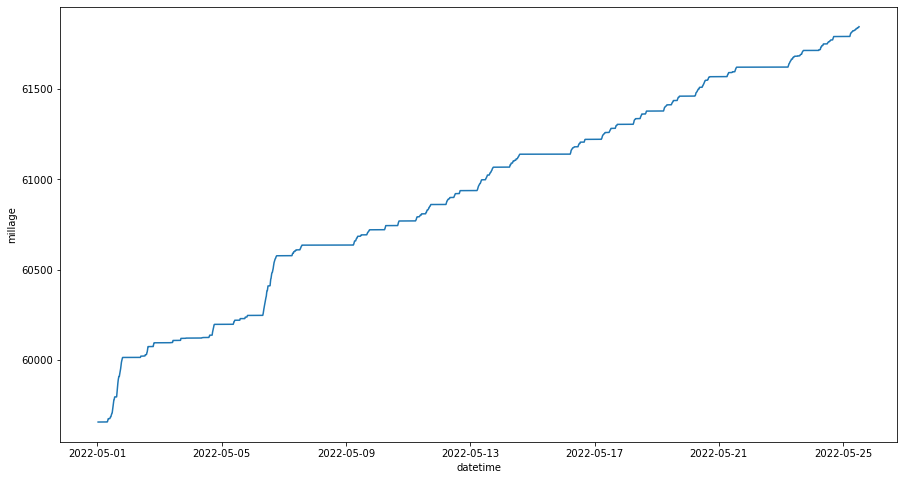

In [95]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=df_rep.reset_index(), x='datetime', y='millage', ax=ax);

In [114]:
df_vel_mean = df_rep[df_rep['ignition'] == True].groupby(['location'])[['velocity']].mean()
df_vel_mean.sort_values(by='velocity', ascending=False, inplace=True)

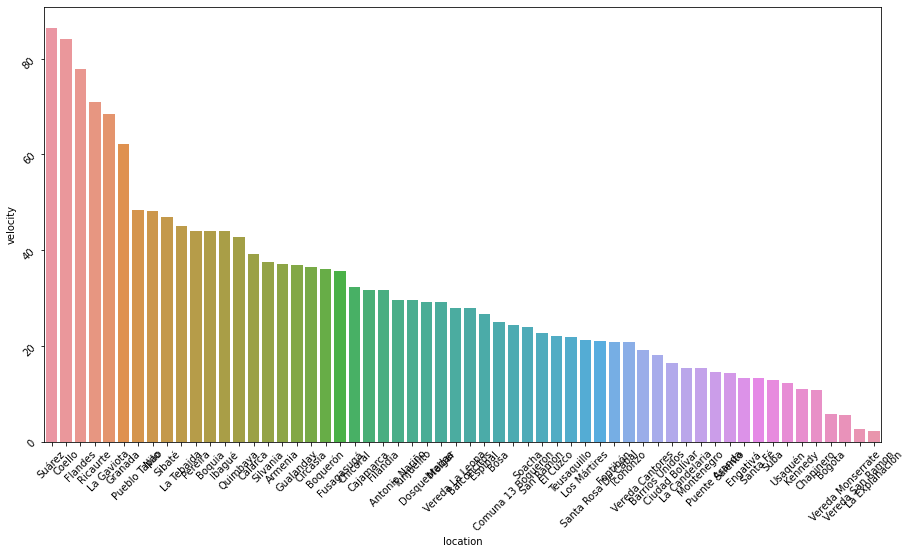

In [115]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=df_vel_mean.reset_index(), x='location', y='velocity', ax=ax)
ax.tick_params(labelrotation=45)
plt.show();

In [123]:
df_traffic_days = df_traffic.copy()
df_traffic_days['day'] = df_traffic_days.index.weekday

In [128]:
import calendar

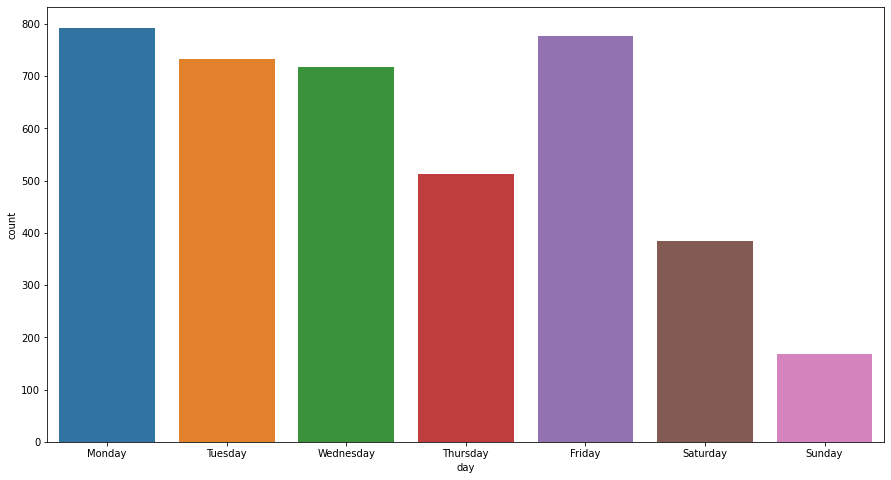

In [130]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=df_traffic_days.reset_index(), x='day', ax=ax)
ax.set_xticklabels(calendar.day_name)
plt.show();